In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels
sns.set_theme(style="ticks")
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols
from statsmodels.othermod import betareg

In [2]:
all_teams = pd.read_csv('result_all_teams.csv')

In [3]:
all_teams

,TEAM_ID,TEAM_NAME,YEAR,WIN_PCT,FG_PCT,REB,AST_TOV_RAT,PTS
0,1610612739,Cavaliers,1982,0.280,0.465,43.7,1.127660,97.1
1,1610612739,Cavaliers,1983,0.341,0.465,43.9,1.450617,102.3
2,1610612739,Cavaliers,1984,0.439,0.471,44.5,1.514793,108.6
3,1610612739,Cavaliers,1985,0.354,0.480,43.2,1.465116,107.8
4,1610612739,Cavaliers,1986,0.378,0.470,44.8,1.182741,104.4
...,...,...,...,...,...,...,...,...
1181,1610612755,76ers,2019,0.589,0.468,45.4,1.816901,110.7
1182,1610612755,76ers,2020,0.681,0.476,45.1,1.645833,113.6
1183,1610612755,76ers,2021,0.622,0.466,42.3,1.896000,109.9
1184,1610612755,76ers,2022,0.659,0.487,40.9,1.839416,115.2


In [4]:
all_teams.describe()

,TEAM_ID,YEAR,WIN_PCT,FG_PCT,REB,AST_TOV_RAT,PTS
count,1.186000e+03,1186.000000,1186.000000,1186.000000,1186.000000,1186.000000,1186.000000
mean,1.610613e+09,2003.392074,0.499863,0.461295,42.794519,1.542576,102.930270
std,8.571095e+00,11.870919,0.153663,0.020332,2.132650,0.216348,7.644956
min,1.610613e+09,1982.000000,0.106000,0.401000,35.600000,1.011299,81.900000
25%,1.610613e+09,1993.000000,0.381500,0.447000,41.300000,1.386109,97.100000
50%,1.610613e+09,2004.000000,0.512000,0.460000,42.800000,1.523810,102.300000
75%,1.610613e+09,2014.000000,0.611000,0.474750,44.200000,1.681082,108.600000
max,1.610613e+09,2023.000000,0.890000,0.545000,51.700000,2.309524,124.600000


In [5]:
matrix_ready = all_teams[['WIN_PCT','FG_PCT','REB','AST_TOV_RAT','PTS']]

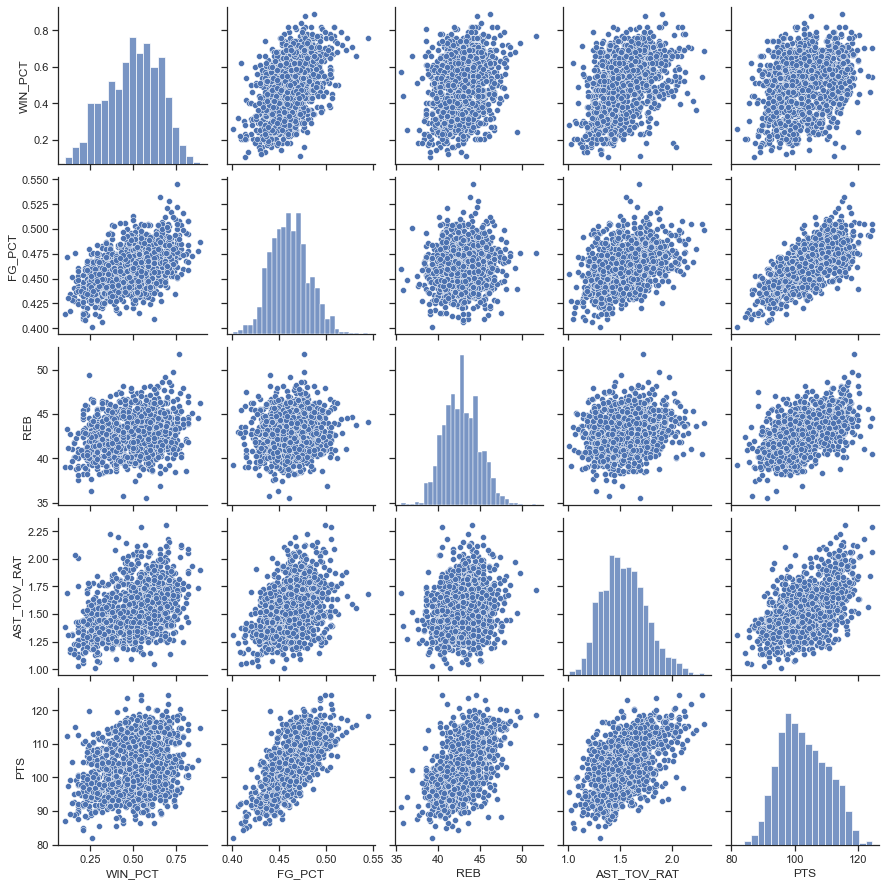

In [6]:
sns.pairplot(matrix_ready)

In [7]:
data_X = all_teams[['FG_PCT','REB','AST_TOV_RAT','PTS']]
data_Y = all_teams['WIN_PCT']

X_train, X_test, y_train, y_test = train_test_split(data_X, data_Y, 
                                                    test_size = 0.3, random_state = 42)
# Write out OLS formula as a string
ols_formula = "WIN_PCT ~ FG_PCT + AST_TOV_RAT"

# Create OLS dataframe
ols_data = pd.concat([X_train, y_train], axis = 1)

# Create OLS object and fit the model
OLS = ols(formula = ols_formula, data = ols_data)
model = OLS.fit()

# Get model results
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                WIN_PCT   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.303
Method:                 Least Squares   F-statistic:                     180.8
Date:                Fri, 26 Jan 2024   Prob (F-statistic):           7.24e-66
Time:                        11:29:00   Log-Likelihood:                 532.28
No. Observations:                 830   AIC:                            -1059.
Df Residuals:                     827   BIC:                            -1044.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -1.1415      0.100    -11.363      0.000      -1.339      -0.944
FG_PCT          2.9703      0.237     12.542      0.000       2.505       3.435
AST_TOV_RAT     0.1765      0.022      8.028      0.000       0.133       0.220
==============================================================================
Omnibus:                        5.819   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.055   Jarque-Bera (JB):                4.946
Skew:                          -0.112   Prob(JB):                       0.0843
Kurtosis:                       2.695   Cond. No.                         110.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
fitted_values = model.predict(X_test)

In [9]:
fitted_values

319     0.671413
956     0.534784
1182    0.562879
86      0.647037
990     0.452904
          ...   
120     0.635715
551     0.611293
918     0.512453
1137    0.493699
72      0.481918
Length: 356, dtype: float64

In [10]:
y_test

319     0.768
956     0.537
1182    0.681
86      0.500
990     0.695
        ...  
120     0.585
551     0.622
918     0.500
1137    0.427
72      0.573
Name: WIN_PCT, Length: 356, dtype: float64

In [11]:
residuals = fitted_values - y_test

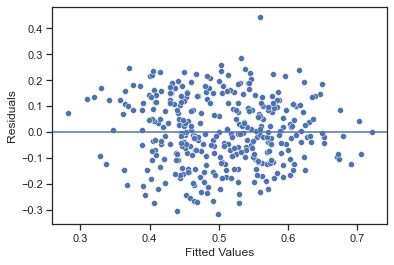

In [12]:
# Create a scatterplot of residuals against fitted values

### YOUR CODE HERE ###

fig = sns.scatterplot(x=fitted_values, y=residuals)
fig.axhline(0)
fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")
plt.show()

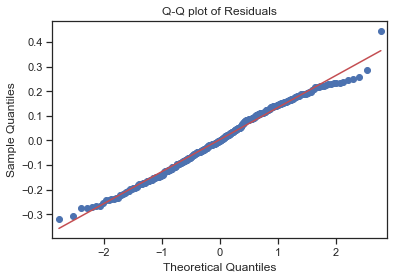

In [13]:
import statsmodels.api as sm
sm.qqplot(residuals, line='s')
plt.title("Q-Q plot of Residuals")
plt.show()

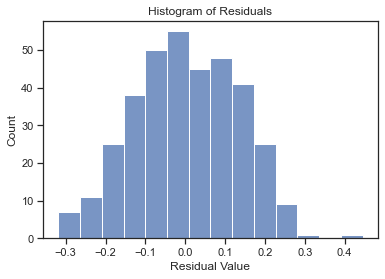

In [14]:
fig = sns.histplot(residuals)
fig.set_xlabel("Residual Value")
fig.set_title("Histogram of Residuals")
plt.show()

In [15]:
standings = pd.read_csv('standings_selected_feat.csv')

In [16]:
standings

,SeasonID,TeamID,TeamName,OppPointsPG,HOME,PlayoffRank
0,1984,1610612738,Celtics,108.1,35-6,1
1,1984,1610612747,Lakers,110.9,36-5,1
2,1984,1610612743,Nuggets,117.6,34-7,2
3,1984,1610612749,Bucks,104.0,36-5,2
4,1984,1610612745,Rockets,109.5,29-12,3
...,...,...,...,...,...,...
1105,2022,1610612757,Trail Blazers,117.4,17-24,13
1106,2022,1610612745,Rockets,118.6,14-27,14
1107,2022,1610612766,Hornets,117.2,13-28,14
1108,2022,1610612759,Spurs,123.1,14-27,15


In [17]:
standings[['HOME_W', 'HOME_L']] = standings['HOME'].str.split('-', expand=True)

In [18]:
standings['HOME_W'] = standings['HOME_W'].astype(int)

In [19]:
standings['HOME_L'] = standings['HOME_L'].astype(int)

In [20]:
standings['HOME_WIN_PCT'] = standings['HOME_W']/(standings['HOME_W']+standings['HOME_L'])

In [21]:
standings = standings.drop(['HOME', 'HOME_W', 'HOME_L'], axis=1)

In [22]:
standings = standings.rename(columns={'SeasonID':'YEAR', 'TeamID':'TEAM_ID', 'OppPointsPG':'OPP_PPG'})

In [23]:
standings['PLAYOFF'] = np.where(standings['PlayoffRank']<=8, 1, 0)

In [24]:
standings = standings.drop(['PlayoffRank'], axis=1)

In [25]:
new_all_teams = all_teams.merge(standings, on=['TEAM_ID', 'YEAR'], how='inner')

In [26]:
new_all_teams = new_all_teams.drop(['TeamName'], axis=1)

In [27]:
new_all_teams

,TEAM_ID,TEAM_NAME,YEAR,WIN_PCT,FG_PCT,REB,AST_TOV_RAT,PTS,OPP_PPG,HOME_WIN_PCT,PLAYOFF
0,1610612739,Cavaliers,1984,0.439,0.471,44.5,1.514793,108.6,111.3,0.487805,1
1,1610612739,Cavaliers,1985,0.354,0.480,43.2,1.465116,107.8,110.6,0.390244,0
2,1610612739,Cavaliers,1986,0.378,0.470,44.8,1.182741,104.4,108.2,0.609756,0
3,1610612739,Cavaliers,1987,0.512,0.490,40.3,1.440000,104.5,103.7,0.756098,1
4,1610612739,Cavaliers,1988,0.695,0.502,42.8,1.714286,108.8,101.2,0.902439,1
...,...,...,...,...,...,...,...,...,...,...,...
1105,1610612755,76ers,2018,0.622,0.471,47.8,1.805369,115.2,112.5,0.756098,1
1106,1610612755,76ers,2019,0.589,0.468,45.4,1.816901,110.7,108.4,0.885714,1
1107,1610612755,76ers,2020,0.681,0.476,45.1,1.645833,113.6,108.1,0.805556,1
1108,1610612755,76ers,2021,0.622,0.466,42.3,1.896000,109.9,107.3,0.585366,1


In [28]:
new_all_teams_matrix = new_all_teams[['WIN_PCT', 'FG_PCT', 'REB', 'AST_TOV_RAT', 'PTS', 'OPP_PPG', 'HOME_WIN_PCT', 'PLAYOFF']]

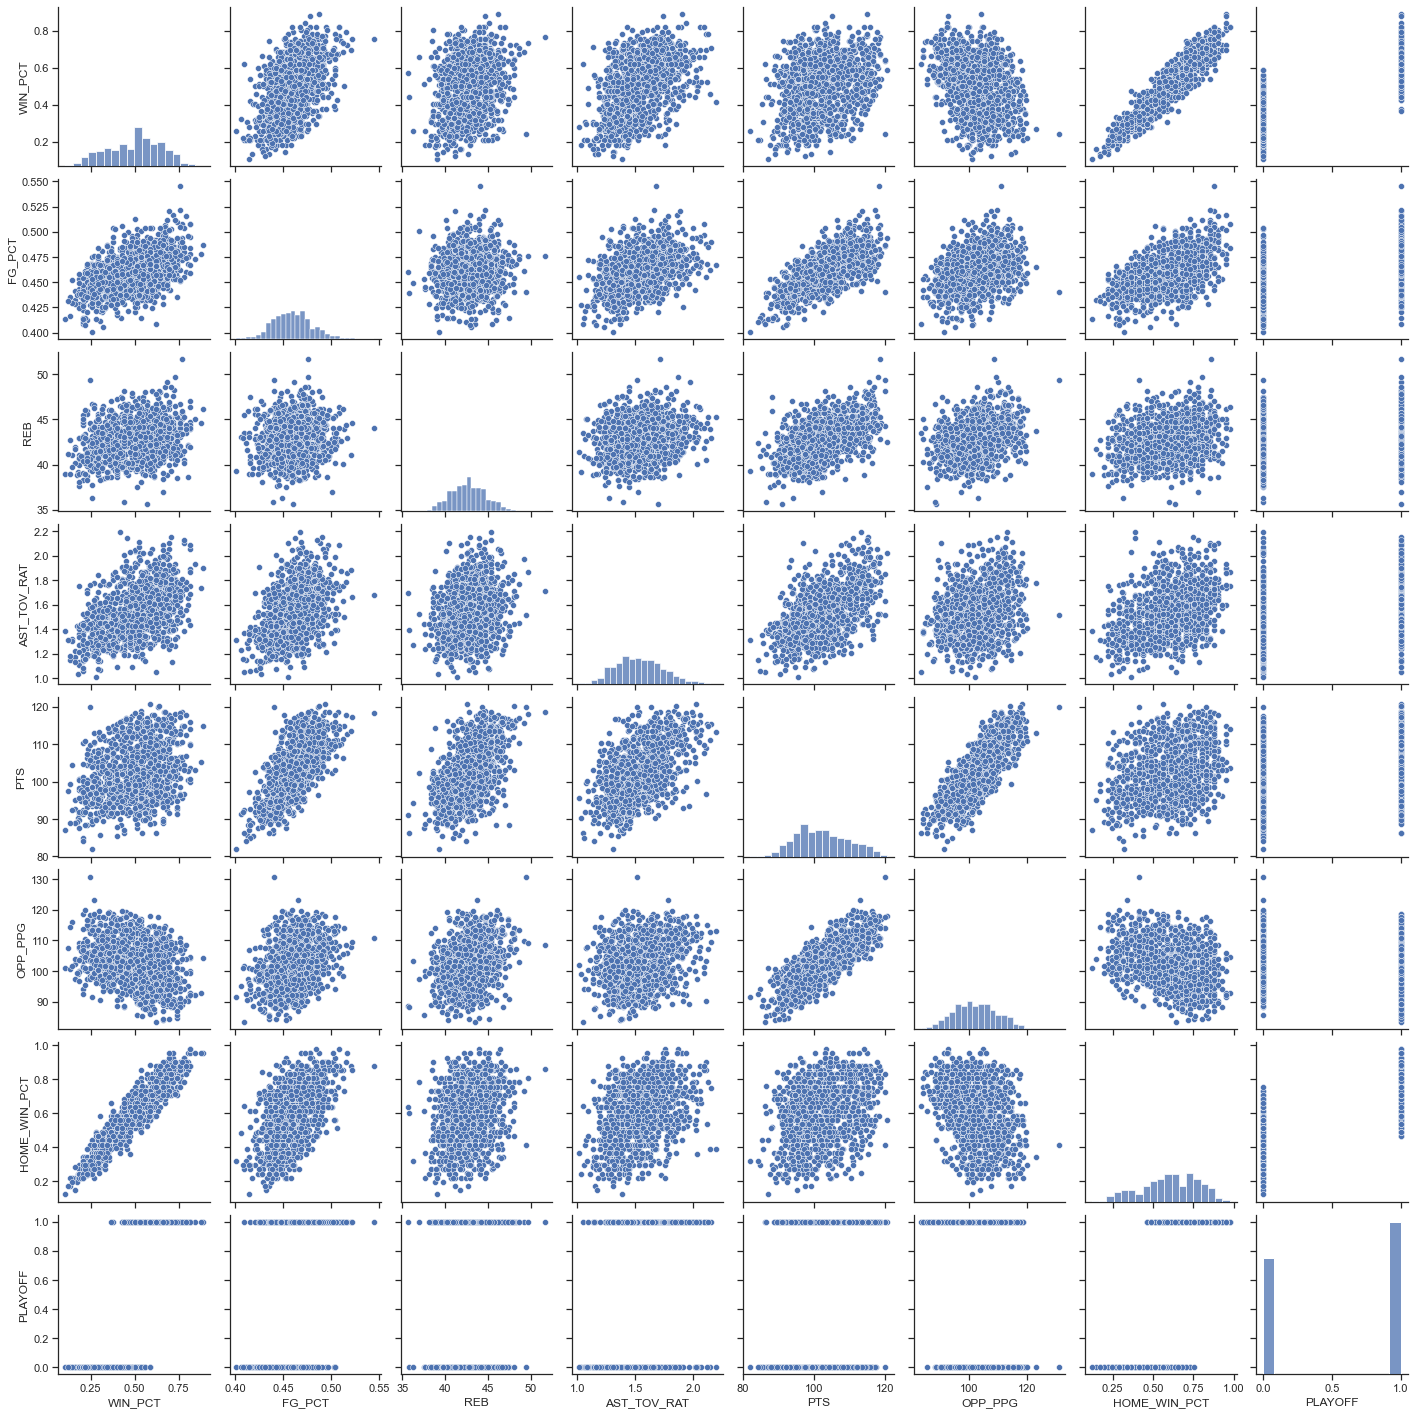

In [29]:
sns.pairplot(new_all_teams_matrix)

In [30]:
new_all_teams_matrix.corr()

,WIN_PCT,FG_PCT,REB,AST_TOV_RAT,PTS,OPP_PPG,HOME_WIN_PCT,PLAYOFF
WIN_PCT,1.000000,0.506564,0.258523,0.455780,0.295043,-0.317766,0.935526,0.804014
FG_PCT,0.506564,1.000000,0.141018,0.422658,0.688496,0.359229,0.529754,0.415349
REB,0.258523,0.141018,1.000000,0.224170,0.515294,0.342266,0.246976,0.207942
AST_TOV_RAT,0.455780,0.422658,0.224170,1.000000,0.554428,0.259467,0.388069,0.339083
PTS,0.295043,0.688496,0.515294,0.554428,1.000000,0.799438,0.287823,0.245752
OPP_PPG,-0.317766,0.359229,0.342266,0.259467,0.799438,1.000000,-0.288661,-0.241865
HOME_WIN_PCT,0.935526,0.529754,0.246976,0.388069,0.287823,-0.288661,1.000000,0.766184
PLAYOFF,0.804014,0.415349,0.207942,0.339083,0.245752,-0.241865,0.766184,1.000000


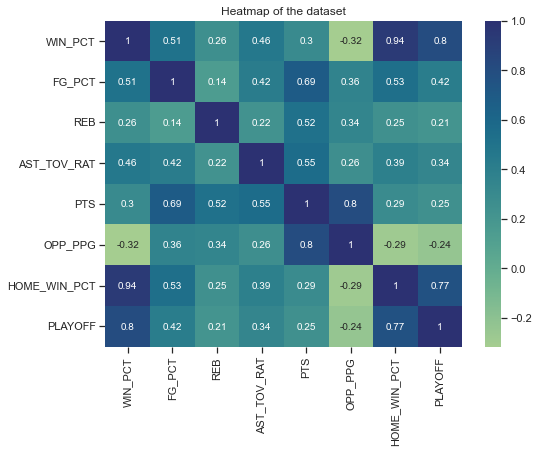

In [31]:
# Create a heatmap to visualize how correlated variables are
plt.figure(figsize=(8, 6))
sns.heatmap(
    new_all_teams_matrix.corr(), 
    annot=True, 
    cmap="crest")
plt.title("Heatmap of the dataset")
plt.show()

In [57]:
new_all_teams_scaled = new_all_teams.copy()

In [58]:
new_all_teams_scaled

,TEAM_ID,TEAM_NAME,YEAR,WIN_PCT,FG_PCT,REB,AST_TOV_RAT,PTS,OPP_PPG,HOME_WIN_PCT,PLAYOFF
0,1610612739,Cavaliers,1984,0.439,0.471,44.5,1.514793,108.6,111.3,0.487805,1
1,1610612739,Cavaliers,1985,0.354,0.480,43.2,1.465116,107.8,110.6,0.390244,0
2,1610612739,Cavaliers,1986,0.378,0.470,44.8,1.182741,104.4,108.2,0.609756,0
3,1610612739,Cavaliers,1987,0.512,0.490,40.3,1.440000,104.5,103.7,0.756098,1
4,1610612739,Cavaliers,1988,0.695,0.502,42.8,1.714286,108.8,101.2,0.902439,1
...,...,...,...,...,...,...,...,...,...,...,...
1105,1610612755,76ers,2018,0.622,0.471,47.8,1.805369,115.2,112.5,0.756098,1
1106,1610612755,76ers,2019,0.589,0.468,45.4,1.816901,110.7,108.4,0.885714,1
1107,1610612755,76ers,2020,0.681,0.476,45.1,1.645833,113.6,108.1,0.805556,1
1108,1610612755,76ers,2021,0.622,0.466,42.3,1.896000,109.9,107.3,0.585366,1


In [109]:
new_all_teams_scaled['OPP_PPG'] = new_all_teams['OPP_PPG']/100
new_all_teams_scaled['REB'] = new_all_teams['REB']/10

In [110]:
new_all_teams_scaled

,TEAM_ID,TEAM_NAME,YEAR,WIN_PCT,FG_PCT,REB,AST_TOV_RAT,PTS,OPP_PPG,HOME_WIN_PCT,PLAYOFF
0,1610612739,Cavaliers,1984,0.439,0.471,4.45,1.514793,108.6,1.113,0.487805,1
1,1610612739,Cavaliers,1985,0.354,0.480,4.32,1.465116,107.8,1.106,0.390244,0
2,1610612739,Cavaliers,1986,0.378,0.470,4.48,1.182741,104.4,1.082,0.609756,0
3,1610612739,Cavaliers,1987,0.512,0.490,4.03,1.440000,104.5,1.037,0.756098,1
4,1610612739,Cavaliers,1988,0.695,0.502,4.28,1.714286,108.8,1.012,0.902439,1
...,...,...,...,...,...,...,...,...,...,...,...
1105,1610612755,76ers,2018,0.622,0.471,4.78,1.805369,115.2,1.125,0.756098,1
1106,1610612755,76ers,2019,0.589,0.468,4.54,1.816901,110.7,1.084,0.885714,1
1107,1610612755,76ers,2020,0.681,0.476,4.51,1.645833,113.6,1.081,0.805556,1
1108,1610612755,76ers,2021,0.622,0.466,4.23,1.896000,109.9,1.073,0.585366,1


In [61]:
new_all_teams

,TEAM_ID,TEAM_NAME,YEAR,WIN_PCT,FG_PCT,REB,AST_TOV_RAT,PTS,OPP_PPG,HOME_WIN_PCT,PLAYOFF
0,1610612739,Cavaliers,1984,0.439,0.471,44.5,1.514793,108.6,111.3,0.487805,1
1,1610612739,Cavaliers,1985,0.354,0.480,43.2,1.465116,107.8,110.6,0.390244,0
2,1610612739,Cavaliers,1986,0.378,0.470,44.8,1.182741,104.4,108.2,0.609756,0
3,1610612739,Cavaliers,1987,0.512,0.490,40.3,1.440000,104.5,103.7,0.756098,1
4,1610612739,Cavaliers,1988,0.695,0.502,42.8,1.714286,108.8,101.2,0.902439,1
...,...,...,...,...,...,...,...,...,...,...,...
1105,1610612755,76ers,2018,0.622,0.471,47.8,1.805369,115.2,112.5,0.756098,1
1106,1610612755,76ers,2019,0.589,0.468,45.4,1.816901,110.7,108.4,0.885714,1
1107,1610612755,76ers,2020,0.681,0.476,45.1,1.645833,113.6,108.1,0.805556,1
1108,1610612755,76ers,2021,0.622,0.466,42.3,1.896000,109.9,107.3,0.585366,1


In [111]:
data_X = new_all_teams_scaled[['FG_PCT','REB','AST_TOV_RAT','OPP_PPG']]
data_Y = new_all_teams_scaled['WIN_PCT']
X_train, X_test, y_train, y_test = train_test_split(data_X, data_Y, 
                                                    test_size = 0.3, random_state = 42)

In [112]:
X_train

,FG_PCT,REB,AST_TOV_RAT,OPP_PPG
312,0.444,4.30,1.376623,1.001
581,0.449,4.21,1.403974,0.988
221,0.481,4.67,1.621795,1.028
235,0.431,4.29,1.137725,0.962
519,0.480,4.70,1.448649,1.053
...,...,...,...,...
466,0.435,4.17,1.500000,0.856
121,0.433,4.33,1.705036,0.973
1044,0.454,4.28,1.510067,0.957
1095,0.459,4.12,1.425532,0.973


In [114]:



# Write out OLS formula as a string
ols_formula = "WIN_PCT ~ FG_PCT + AST_TOV_RAT + REB + OPP_PPG"

# Create OLS dataframe
ols_data = pd.concat([X_train, y_train], axis = 1)

# Create OLS object and fit the model
OLS = ols(formula = ols_formula, data = ols_data)
model = OLS.fit()

# Get model results
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                WIN_PCT   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     646.4
Date:                Fri, 26 Jan 2024   Prob (F-statistic):          1.13e-244
Time:                        11:43:23   Log-Likelihood:                 919.72
No. Observations:                 777   AIC:                            -1829.
Df Residuals:                     772   BIC:                            -1806.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -1.4944      0.077    -19.357      0.000      -1.646      -1.343
FG_PCT          4.5583      0.153     29.697      0.000       4.257       4.860
AST_TOV_RAT     0.2412      0.014     16.724      0.000       0.213       0.269
REB             0.2661      0.013     19.964      0.000       0.240       0.292
OPP_PPG        -1.5742      0.041    -38.563      0.000      -1.654      -1.494
==============================================================================
Omnibus:                        9.104   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                9.052
Skew:                           0.252   Prob(JB):                       0.0108
Kurtosis:                       3.160   Cond. No.                         295.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [115]:
fitted_values = model.predict(X_test)

In [116]:
fitted_values

884    0.322057
342    0.683716
56     0.379475
694    0.171578
721    0.627411
         ...   
486    0.205275
992    0.481177
398    0.657251
254    0.177529
909    0.541888
Length: 333, dtype: float64

In [117]:
y_test

884    0.232
342    0.768
56     0.256
694    0.207
721    0.537
       ...  
486    0.183
992    0.549
398    0.622
254    0.299
909    0.573
Name: WIN_PCT, Length: 333, dtype: float64

In [118]:
residuals = fitted_values - y_test

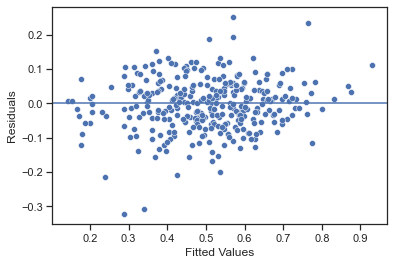

In [119]:
# Create a scatterplot of residuals against fitted values

### YOUR CODE HERE ###

fig = sns.scatterplot(x=fitted_values, y=residuals)
fig.axhline(0)
fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")
plt.show()

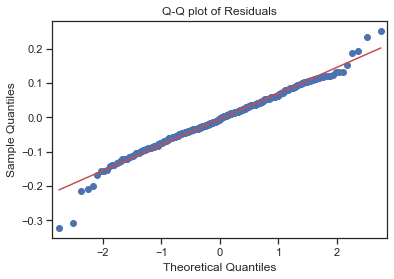

In [120]:
import statsmodels.api as sm
sm.qqplot(residuals, line='s')
plt.title("Q-Q plot of Residuals")
plt.show()

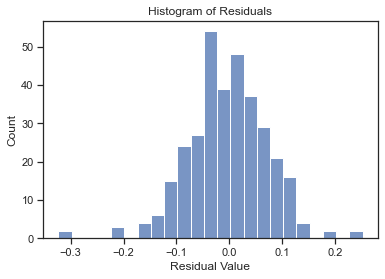

In [121]:
fig = sns.histplot(residuals)
fig.set_xlabel("Residual Value")
fig.set_title("Histogram of Residuals")
plt.show()

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [42]:
X_train_scaled = pd.DataFrame(X_train_scaled)

In [43]:
X_train_scaled = X_train_scaled.rename(columns={0:'FG_PCT', 1:'REB', 2:'AST_TOV_RAT', 3:'OPP_PPG'})
X_train_scaled

,FG_PCT,REB,AST_TOV_RAT,OPP_PPG
0,-0.788871,0.102433,-0.770074,-0.308493
1,-0.537311,-0.310189,-0.638475,-0.481282
2,1.072679,1.798767,0.409608,0.050378
3,-1.442930,0.056586,-1.919574,-0.826861
4,1.022367,1.936307,-0.423513,0.382665
...,...,...,...,...
772,-1.241681,-0.493577,-0.176428,-2.235760
773,-1.342305,0.239973,0.810136,-0.680655
774,-0.285750,0.010739,-0.127988,-0.893319
775,-0.034189,-0.722811,-0.534743,-0.680655
